# Exploring OpenAI API

## Task 1: Import Libraries

In [2]:
import openai
import math
import os
import wget # this is isu to download files
import pathlib 
from base64 import b64decode # this is use for decoding base64
import io # is use for I/O operations files
from PIL import Image # this is use for displaying images
from dotenv import load_dotenv # this is use for loading .env file
load_dotenv("./.env") # this is use for loading .env file

True

## Task 2: Set Up the API key

To configure the openai api key we need to get the api key from the openai website and then we need to configure it as follows. For this case we will use the API key and the organization ID as a environment variable. 


In [3]:
openai.api_key = os.getenv("API_KEY")
openai.organization = os.getenv("ORGANIZATION_ID")
openai.Model.list() # this is use for listing all the models

<OpenAIObject list at 0x109813410> JSON: {
  "object": "list",
  "data": [
    {
      "id": "babbage",
      "object": "model",
      "created": 1649358449,
      "owned_by": "openai",
      "permission": [
        {
          "id": "modelperm-49FUp5v084tBB49tC4z8LPH5",
          "object": "model_permission",
          "created": 1669085501,
          "allow_create_engine": false,
          "allow_sampling": true,
          "allow_logprobs": true,
          "allow_search_indices": false,
          "allow_view": true,
          "allow_fine_tuning": false,
          "organization": "*",
          "group": null,
          "is_blocking": false
        }
      ],
      "root": "babbage",
      "parent": null
    },
    {
      "id": "text-davinci-003",
      "object": "model",
      "created": 1669599635,
      "owned_by": "openai-internal",
      "permission": [
        {
          "id": "modelperm-jepinXYt59ncUQrjQEIUEDyC",
          "object": "model_permission",
          "created": 168

# Email Generation
## Task 3: Provide the Examples

In this project we goona use the davinci model for generating text in base of the prompt that we give to the model. 
This case study is about purchases in a e-commerce website and we want to generate a email to the customer that who has left a review to the seller. This response is generated from training data from other product reviews and seller responses 

In [24]:
# we form the training data by concatenating the input and output strings together 
iPrefix = "\n\nReview:\n"
iSuffix = "\n"
oPrefix = "\nEmail:\n"


review1 = "Nice socks, great colors, just enough support for wearing with a good pair of sneakers."
email = "Dear Customer, Thank you for buying socks form our store. Our socks come in a wide range of colors and types. We also sell sneakers on our platform, make sure to check out the huge collection online. Regards, Time Store"
review2 = "Love Deborah Harness's Trilogy! Didn't want the story to end and hope they turn this trilogy into a movie. I would love it if she wrote more books to continue this story!!!"
email2 = "Dear Customer, Thank you for purchasing the book from our store. We have many other books from Deborah Harness. We also have many movies with a similar theme. Make sure to check them out! Regards, Time Store"
review3 = "SO much quieter than other compressors. VERY quick as well. You will not regret this purchase."
email3 = "Dear Customer, Thank you for buying from our platform. Our compressors are among the best in the market. Make sure to check out our wide range of products. Regards, Time Store"



## Task 4: Create the Flow

In [25]:
flow = iPrefix + review1 + iSuffix \
       + oPrefix + email + iPrefix \
       + review2 + iSuffix + oPrefix \
       + email2  + iPrefix + review3 \
       + iSuffix + oPrefix + email3

engine = "text-davinci-003"
max_tok = 3000
print(flow)



Review:
Nice socks, great colors, just enough support for wearing with a good pair of sneakers.

Email:
Dear Customer, Thank you for buying socks form our store. Our socks come in a wide range of colors and types. We also sell sneakers on our platform, make sure to check out the huge collection online. Regards, Time Store

Review:
Love Deborah Harness's Trilogy! Didn't want the story to end and hope they turn this trilogy into a movie. I would love it if she wrote more books to continue this story!!!

Email:
Dear Customer, Thank you for purchasing the book from our store. We have many other books from Deborah Harness. We also have many movies with a similar theme. Make sure to check them out! Regards, Time Store

Review:
SO much quieter than other compressors. VERY quick as well. You will not regret this purchase.

Email:
Dear Customer, Thank you for buying from our platform. Our compressors are among the best in the market. Make sure to check out our wide range of products. Regards,

## Task 5: Generate Emails

In this task we generate the emails to the customers that has left a review on our platform.
Here we simulate that the client of our ecommerce has left his review and the generative model will respond to the client based on the comments.


In [26]:
# Example 1
r1 = "Shirt a bit too long, with heavy hem, which inhibits turning over. I cut off the bottom two inches all around, and am now somewhat comfortable. Overall, material is a bit too heavy for my liking."
text = flow + iPrefix + r1 + iSuffix + oPrefix
response = openai.Completion.create(
    engine = engine,
    prompt = text,
    temperature = 0.7,
    max_tokens = max_tok,
    top_p = 1,
    frequency_penalty=0,
    presence_penalty=0,
    stop = ["Time Store"]
)

print(response["choices"][0]["text"])

Dear Customer, Thank you for buying our shirt. We apologize that it did not fit as expected. We have a wide range of shirts in different material and sizes. Make sure to check them out! Regards, 


In [27]:
# example 2 
review = "The quality on these speakers is insanely good and doesn't sound muddy when adjusting bass. Very happy with these."
text = flow + iPrefix + review + iSuffix + oPrefix
response = openai.Completion.create(engine=engine,prompt=text,
                                          temperature=0.7,
                                          max_tokens=max_tok,
                                          top_p=1,
                                          frequency_penalty=0,
                                          presence_penalty=0,
                                          stop=["Time Store"]
                                          )
print(response["choices"][0]["text"])

Dear Customer, Thank you for buying speakers from us. We are glad you are satisfied with them. We also have a wide range of other products which you can check out. Regards, 


In [28]:
# example 3
review = "Beautiful watch face. The band looks nice all around. The links do make that squeaky cheapo noise when you swing it back and forth on your wrist which can be embarrassing in front of watch enthusiasts. However, to the naked eye from afar, you can't tell the links are cheap or folded because it is well polished and brushed and the folds are pretty tight for the most part. love the new member of my collection and it looks great. I've had it for about a week and so far it has kept good time despite day 1 which is typical of a new mechanical watch."
text = flow + iPrefix + review + iSuffix + oPrefix
response = openai.Completion.create(engine=engine,prompt=text,
                                          temperature=0.7,
                                          max_tokens=max_tok,
                                          top_p=1,
                                          frequency_penalty=0,
                                          presence_penalty=0,
                                          stop=["Time Store"]
                                          )
print(response["choices"][0]["text"])

Dear Customer, Thank you for purchasing our watch. We are glad you are happy with it. We have many other watches with different designs, so make sure to check them out. Regards, 


# Code Generation
## Task 6: Provide Model Parameters

In this section we goona use generative code models. Writers with natural language some very popular algorithms that are often put in technical interviews, we will indicate in our prompt so that the code is generated in python

In [29]:
# Cofiguration of the model
prefix = "Input:\nPython code for "
suffix = "\nOutput:\n"
engine = 'text-davinci-003'
max_tok = 3000


## Task 7: Generate Code

In [33]:
# this libraries are use for displaying the code in the notebook
from IPython.display import HTML, display
import pygments
from pygments.formatters import HtmlFormatter
from pygments.lexers import PythonLexer

In [34]:
# 1st algorithm example
text = "largest merge of two strings"
text = prefix + text + suffix
response = openai.Completion.create(engine=engine,prompt=text,
                                          temperature=0.7,
                                          max_tokens=max_tok,
                                          top_p=1,
                                          frequency_penalty=0,
                                          presence_penalty=0,
                                          stop=["Explanation"]
                                          )
code = response["choices"][0]["text"]

# we define the lexer for Python syntax highlighting
lexer = PythonLexer()

# we format the code as HTML with syntax highlighting
formatter = HtmlFormatter(full=True, style='default')
highlighted_code = pygments.highlight(code, lexer, formatter)

# Displaying the highlighted code in the notebook
displayed_code = f'<pre>{highlighted_code}</pre>'
display(HTML(displayed_code))

In [35]:
# 2nd algorithm example
text = "sum of unique elements"
text = prefix + text + suffix
response = openai.Completion.create(engine=engine,prompt=text,
                                          temperature=0.7,
                                          max_tokens=max_tok,
                                          top_p=1,
                                          frequency_penalty=0,
                                          presence_penalty=0,
                                          stop=["Explanation"]
                                          )
code = response["choices"][0]["text"]

# we define the lexer for Python syntax highlighting
lexer = PythonLexer()

# we format the code as HTML with syntax highlighting
formatter = HtmlFormatter(full=True, style='default')
highlighted_code = pygments.highlight(code, lexer, formatter)

# Displaying the highlighted code in the notebook
displayed_code = f'<pre>{highlighted_code}</pre>'
display(HTML(displayed_code))

In [36]:
# 3rd algorithm example
text = "longest palindrome"
text = prefix + text + suffix
response = openai.Completion.create(engine=engine,prompt=text,
                                          temperature=0.7,
                                          max_tokens=max_tok,
                                          top_p=1,
                                          frequency_penalty=0,
                                          presence_penalty=0,
                                          stop=["Explanation"]
                                          )
code = response["choices"][0]["text"]

# we define the lexer for Python syntax highlighting
lexer = PythonLexer()

# we format the code as HTML with syntax highlighting
formatter = HtmlFormatter(full=True, style='default')
highlighted_code = pygments.highlight(code, lexer, formatter)

# Displaying the highlighted code in the notebook
displayed_code = f'<pre>{highlighted_code}</pre>'
display(HTML(displayed_code))



In [37]:
# 4th algorithm example
text = "convert sorted list to binary search tree"
text = prefix + text + suffix
response = openai.Completion.create(engine=engine,prompt=text,
                                          temperature=0.7,
                                          max_tokens=max_tok,
                                          top_p=1,
                                          frequency_penalty=0,
                                          presence_penalty=0,
                                          stop=["Explanation"]
                                          )
code = response["choices"][0]["text"]

# we define the lexer for Python syntax highlighting
lexer = PythonLexer()

# we format the code as HTML with syntax highlighting
formatter = HtmlFormatter(full=True, style='default')
highlighted_code = pygments.highlight(code, lexer, formatter)

# Displaying the highlighted code in the notebook
displayed_code = f'<pre>{highlighted_code}</pre>'
display(HTML(displayed_code))



# Text Summarization

In this section i am show you how to use the model to summarize text 


## Task 8: Prepare the Text

In [40]:
text = input("Enter any text here: ")
text = text.replace('\n', ' ')
print(len(text))

8669


In [41]:
tldr_tag = "\n tl;dr:"
max_tokens = 100
engine = 'text-davinci-003'


## Task 9: Summarize the Text

In [42]:
text = text + tldr_tag
response = openai.Completion.create(engine=engine,
    prompt=text,
    temperature=0.3,
    max_tokens=max_tokens,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    stop=["\n\n"]
    )

print("Text length:", len(text), "\t Response length:", len(response["choices"][0]["text"]) )  
print("Text:\n", text)
print("="*30, "SUMMARY", "="*30)
print(response["choices"][0]["text"])

Text length: 8677 	 Response length: 484
Text:
 Model Architecture Most competitive neural sequence transduction models have an encoder-decoder structure [5, 2, 35]. Here, the encoder maps an input sequence of symbol representations (x1, ..., xn) to a sequence of continuous representations z = (z1, ..., zn). Given z, the decoder then generates an output sequence (y1, ..., ym) of symbols one element at a time. At each step the model is auto-regressive [10], consuming the previously generated symbols as additional input when generating the next. The Transformer follows this overall architecture using stacked self-attention and point-wise, fully connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1, respectively. 3.1 Encoder and Decoder Stacks Encoder: The encoder is composed of a stack of N = 6 identical layers. Each layer has two sub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, positionwise fully conn

# Image Generation
## Task 10: Generate Images

In this section we use a model to generate images

In [12]:
prompt = "A black and white Maltese breed dog posing as a model"
data_dir = pathlib.Path.cwd() / "responses"

data_dir.mkdir(exist_ok=True)

response = openai.Image.create(
    prompt=prompt,
    n=3,
    size="256x256",
    response_format="b64_json",
)

## Task 11: Display the Images

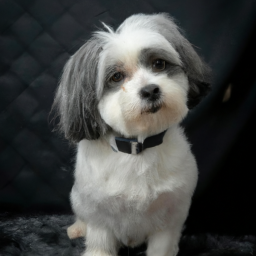

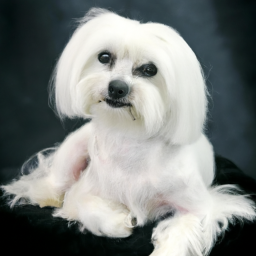

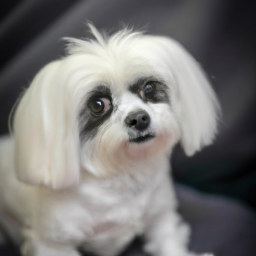

In [13]:
for item in response["data"]: # this for loop is use for displaying each image
    image_data = item["b64_json"] 
    image_decoded = b64decode(image_data) # this is use for decoding the image
    img = Image.open(io.BytesIO(image_decoded)) # this is use for opening the image
    img.show()